# Sales Prediction

### Project Objective : 
Build a model which predicts sales based on the money spent on different platforms for marketing.

## Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv(r"C:\Users\Subhajit Nath\Documents\DataSets\Sales\advertising.csv")
sales.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [3]:
sales.shape
sales

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

## Checking For Null Values

In [6]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

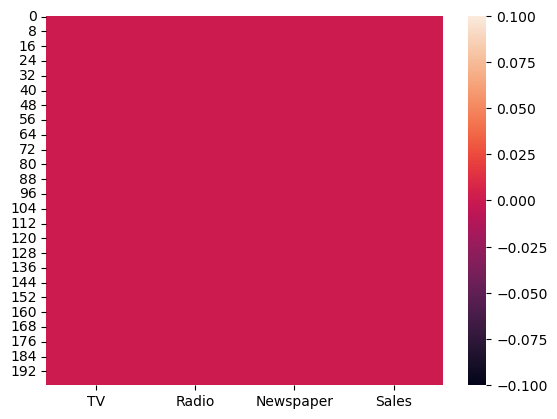

In [7]:
sns.heatmap(sales.isnull())
plt.show()

## Correlations Between Variables

In [12]:
sales.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000

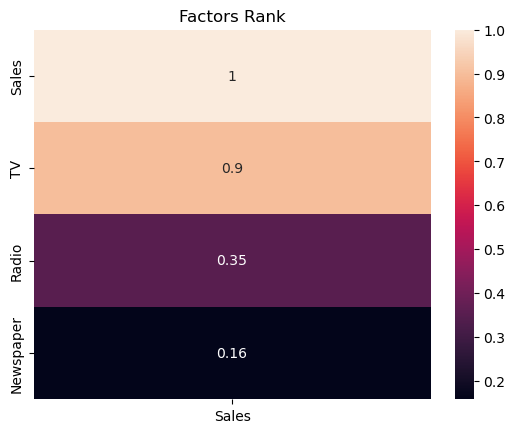

In [23]:
sns.heatmap(sales.corr()[['Sales']].sort_values(by='Sales', ascending=False), annot = True)
plt.title('Factors Rank')
plt.show()

## Data Visualization

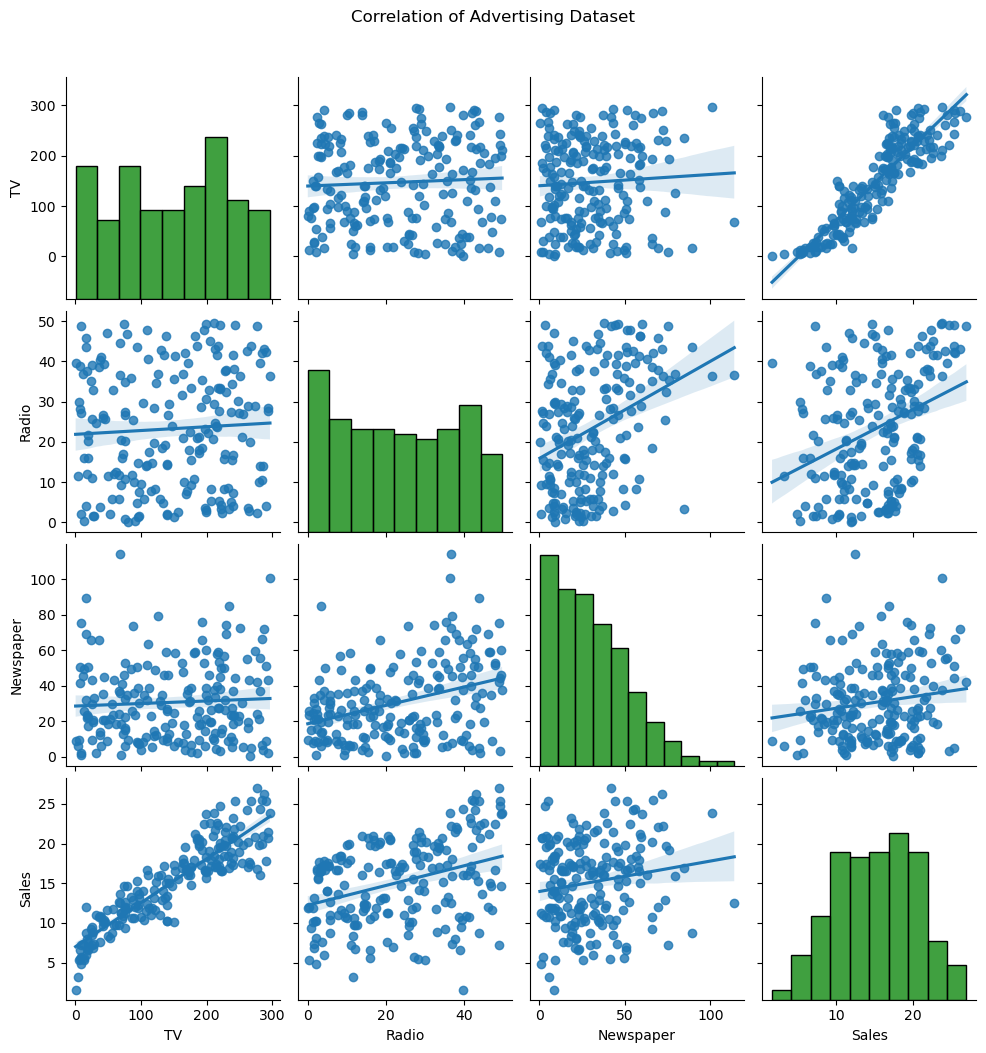

In [13]:
g = sns.pairplot(sales, kind='reg', diag_kws = {'color' : 'green'})
g.fig.suptitle("Correlation of Advertising Dataset", y= 1.05)

plt.show()


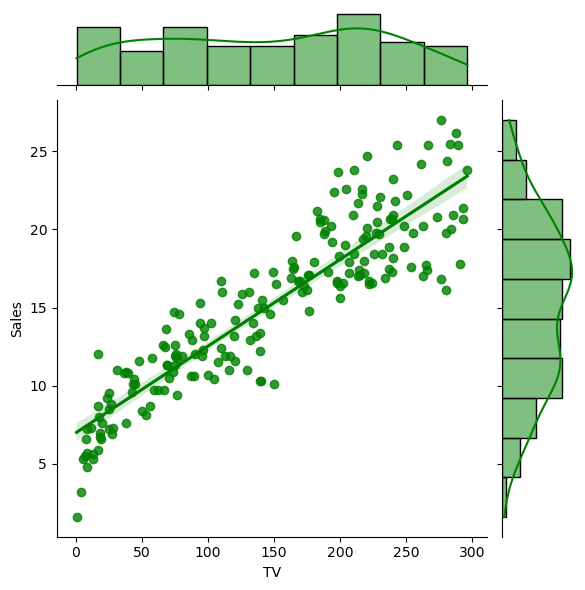

In [14]:
sns.jointplot(x="TV", y="Sales",data=sales,kind="reg",color="green")

plt.show()

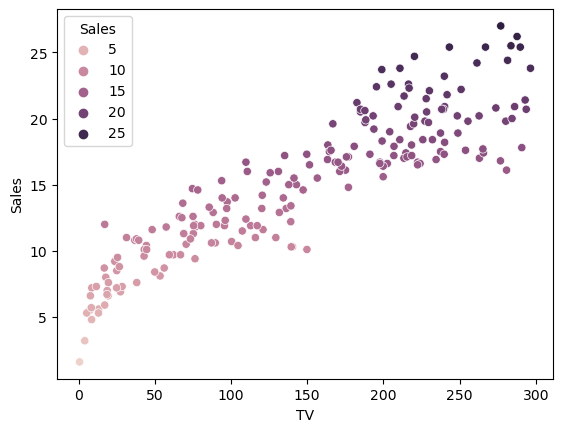

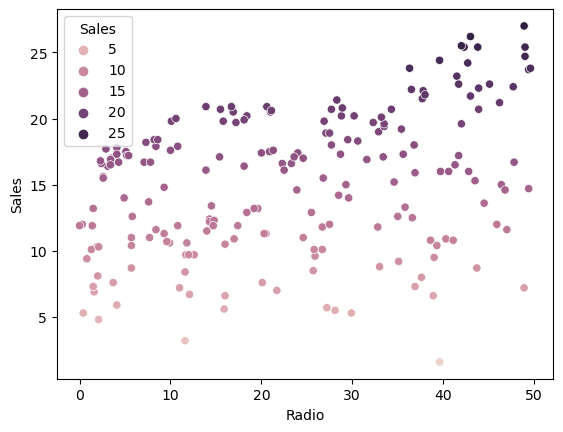

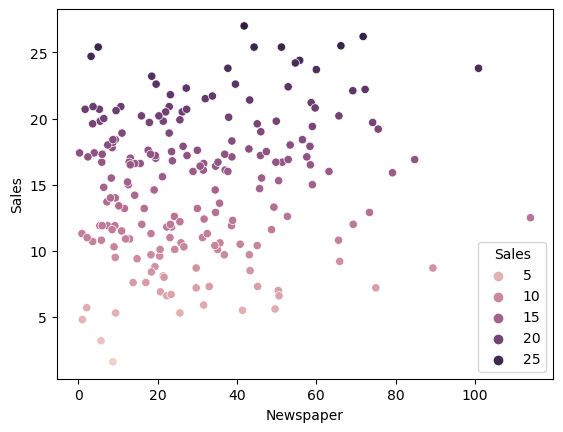

In [15]:
columns = sales.columns[:-1]
for col in columns:
    sns.scatterplot(x=col,y='Sales',data=sales, hue = sales['Sales'])
    plt.show()

 According to the correlation matrix, TV advertisements and Sales are strongly correlated.

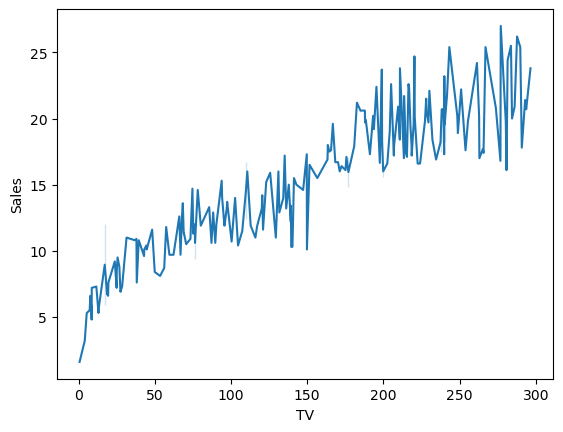

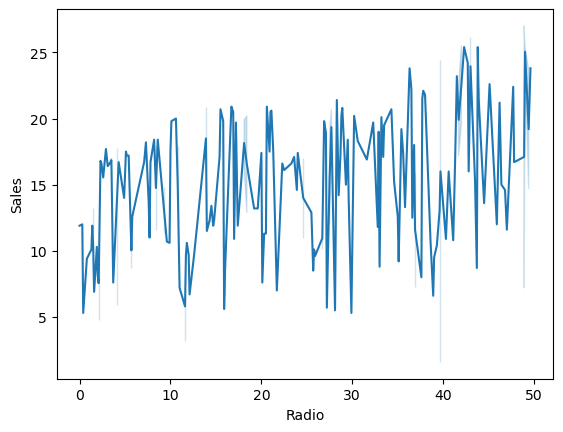

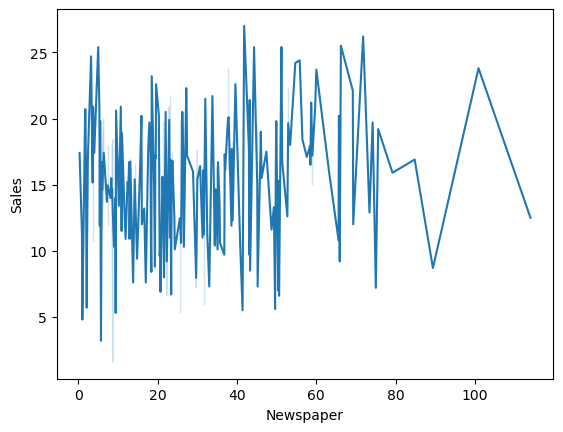

In [16]:
sns.lineplot(data=sales,y='Sales',x='TV')
plt.show()

sns.lineplot(data=sales,y='Sales',x='Radio')
plt.show() 

sns.lineplot(data=sales,y='Sales',x='Newspaper')
plt.show()

## Linear Regression

In [17]:
## Determine X and y
y=sales["Sales"]
X=sales[["TV","Radio","Newspaper"]]
print("X Shape",X.shape,"----------","y Shape",y.shape)

X Shape (200, 3) ---------- y Shape (200,)


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=1/4)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (150, 3)
X_test (50, 3)
y_train (150,)
y_test (50,)


In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)

[0.05461383 0.09975946 0.00430495]


In [20]:
predic=lr.predict(X_test)
print("Predict",predic)
print("------------------------------------------------------------------------------------")
print("y_test",np.array(y_test))

Predict [17.04041233 20.39964377 23.74740099  9.25653209 21.67525948 12.56179334
 21.07865662  8.70895483 17.28353601 16.68491851  8.92573172  8.50762572
 18.2530284   8.06003145 12.68447869 14.96677492  8.12198913 17.91906169
 11.01929198 20.4979062  20.81737524 12.58662099 10.88870324 22.39692163
  9.44183427  7.95532725 20.83706013 13.83997207 10.79282849  7.92309626
 16.00432589 10.64496918 20.79094843 10.40916722 21.61788525 21.1954234
 12.10497731 22.82970275 12.63229447  6.49245031 11.94463925 15.3638056
  9.91037996  9.48003396 17.28192106  7.25660905 10.36937236 15.25293577
 11.17116856 11.72114226]
------------------------------------------------------------------------------------
y_test [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 16.5 16.1 11.   8.7 16.9  5.3
 10.3 16.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2 11.3  8.1 21.7 13.4
 10.6  5.7 15.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9 11.  14.8
 10.1  9.7 16.6  7.6 10.5 14.6 10.4 12. ]


In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2score = r2_score(y_test, predic)
mae = mean_absolute_error(y_test, predic)
mse = mean_squared_error(y_test, predic)
print("Linear Regression : ")
print(f"R2 score : {r2score}")
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")

Linear Regression : 
R2 score : 0.9115647723992757
Mean Absolute Error : 1.1199940713361771
Mean Squared Error : 2.404067444711888


In [22]:
#Model Visiualization
y_test1=y_test.copy()
y_test1=y_test1.sort_index()
df_model=pd.DataFrame({"Truth_Values":y_test1,"Predict_Values":predic})
fig=px.line(df_model,y=["Truth_Values","Predict_Values"],template="plotly_dark")
fig.show()